In [4]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

/home/dima/anaconda2/envs/env_tf/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/dima/anaconda2/envs/env_tf/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [15]:
env = BlackjackEnv()

In [22]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    def increase_returns_count(obs):
        if obs not in returns_sum.keys():
            returns_count[obs] = 0            
        returns_count[obs] += 1
    
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    
    for i_episode in range(num_episodes):
        obs_occured_in_the_episode = []
        observation = env.reset()
        increase_returns_count(observation)
        obs_occured_in_the_episode.append(observation)
        for t in range(100):
            
            # generate action according to probs
            action_probs = policy(observation)
            actions = np.arange(len(action_probs))
            action = np.random.choice(actions, size=None, replace=True, p=action_probs)
            
            #print("Taking action: {}".format( ["Stick", "Hit"][action]))
            observation, reward, done, _ = env.step(action)
            
            for obs in obs_occured_in_the_episode:
                
                if obs not in returns_sum.keys():
                    returns_sum[obs] = 0
                returns_sum[obs] += reward
            
            increase_returns_count(observation)
            obs_occured_in_the_episode.append(observation)
            
            if done:
                #print("Game end. Reward: {}\n".format(float(reward)))
                break
    

    for key in returns_sum.keys():
        V[key] = returns_sum[key] / returns_count [key]
    
    return V  


In [23]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

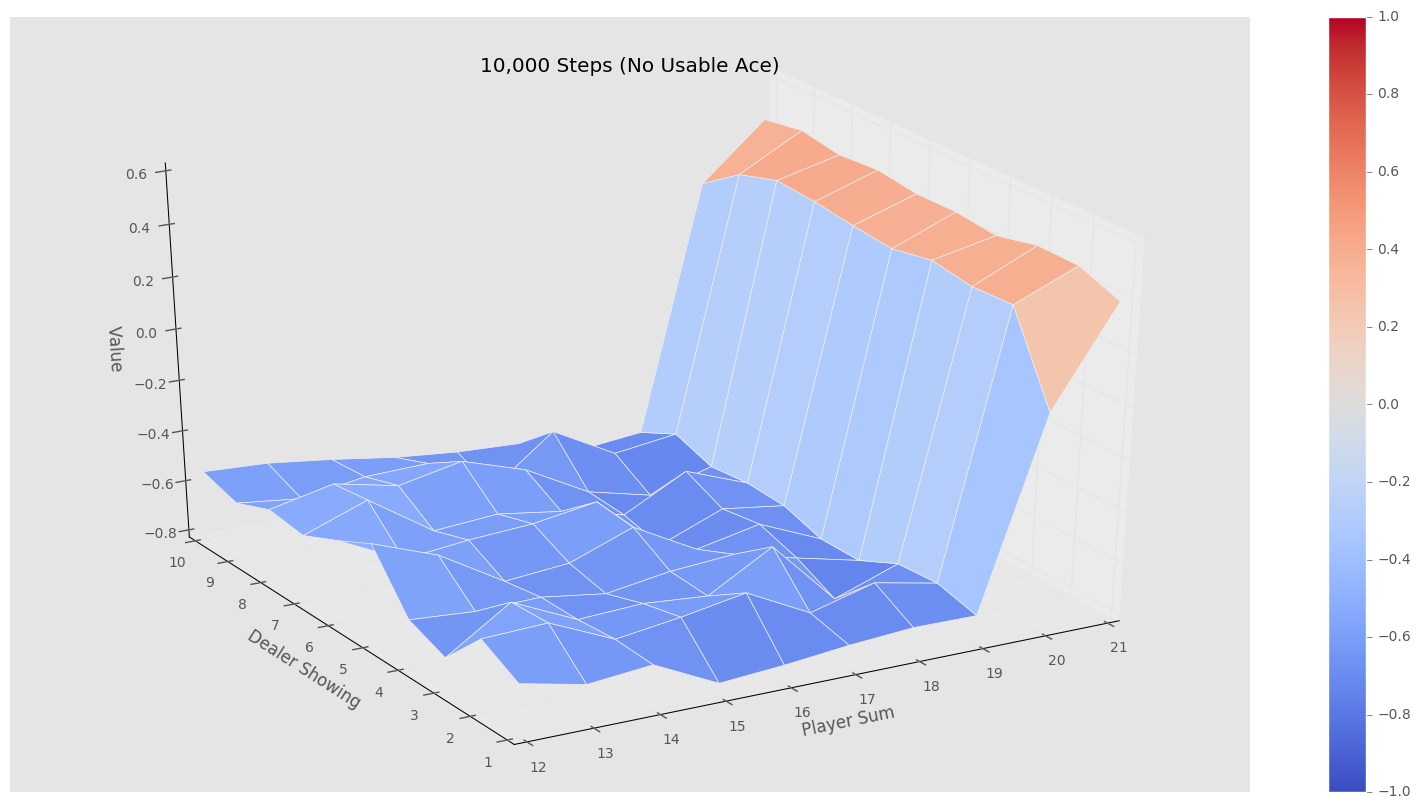

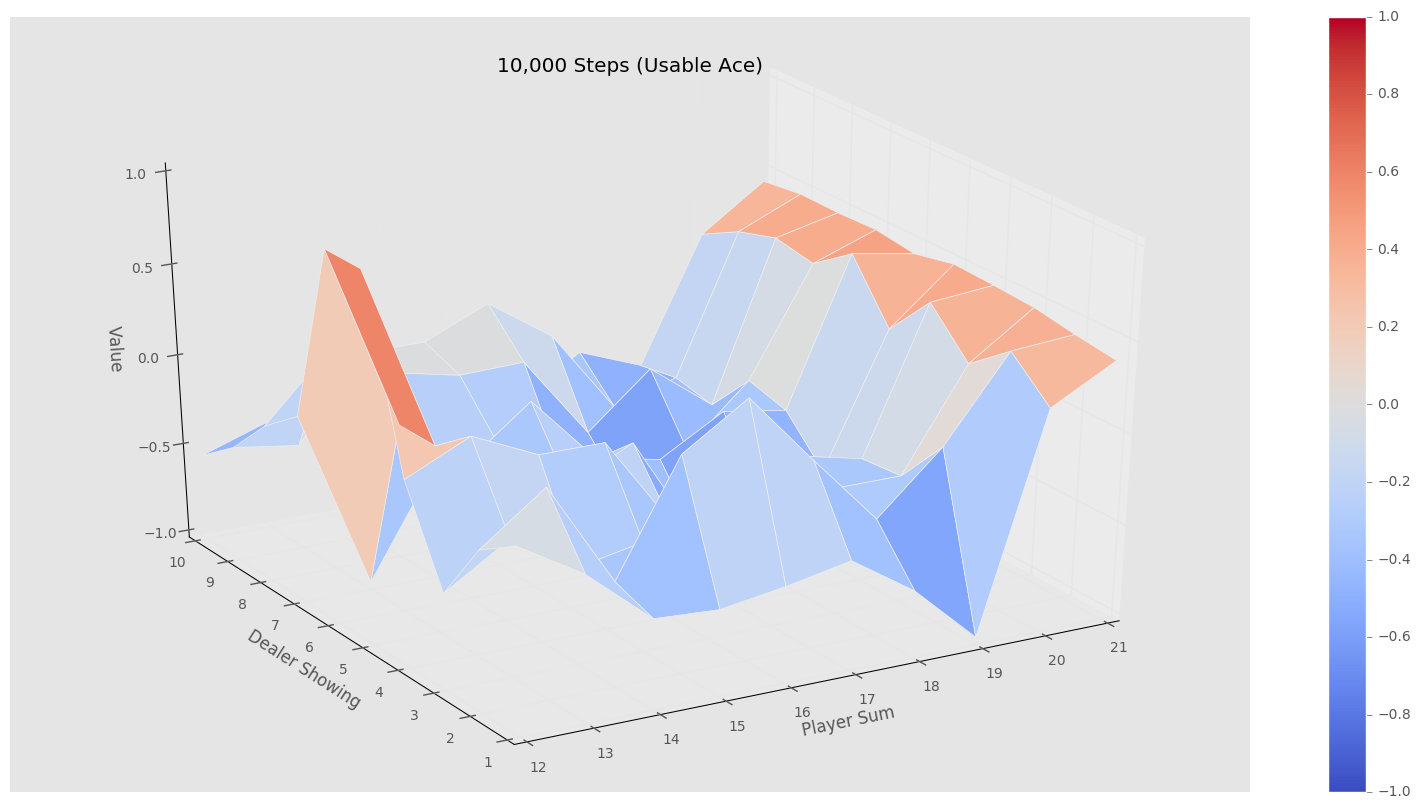

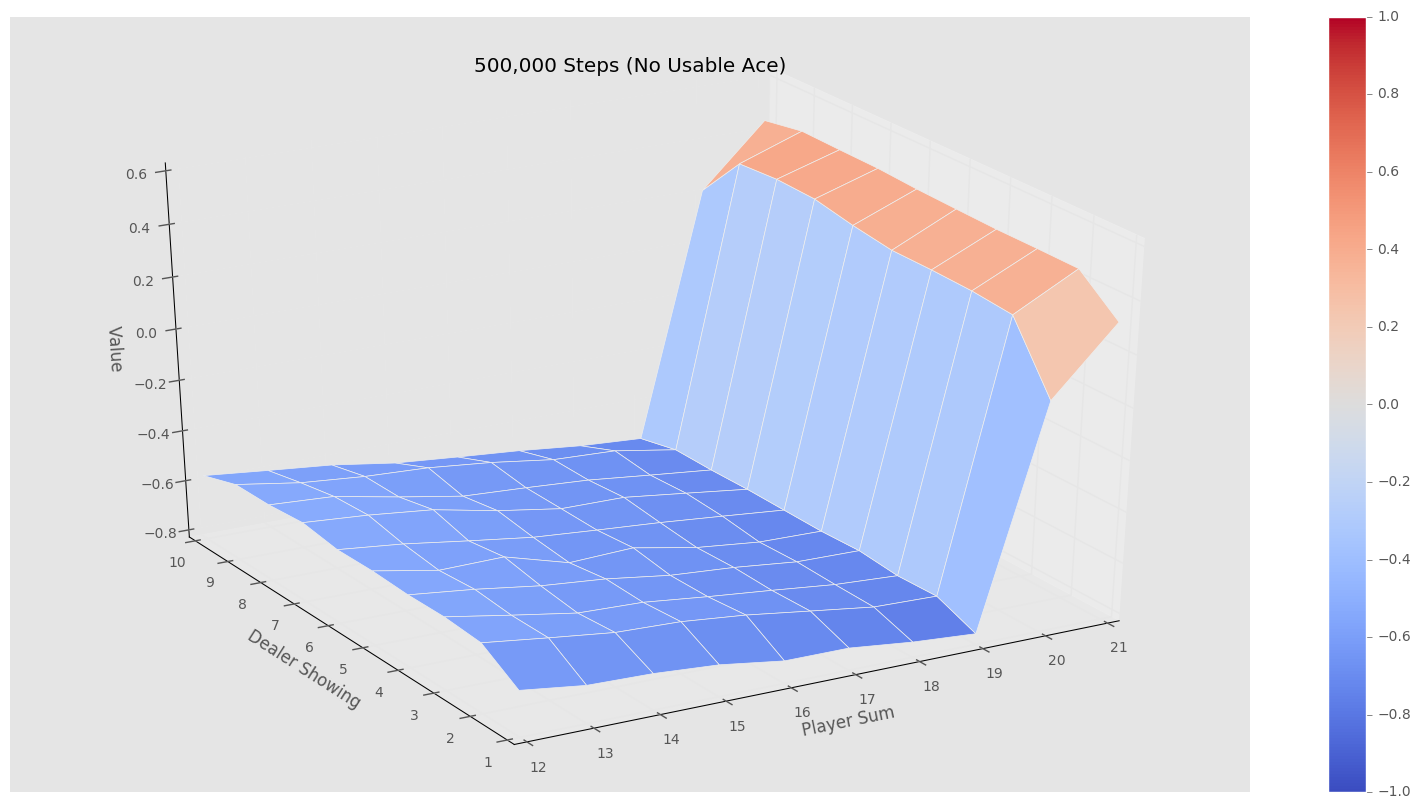

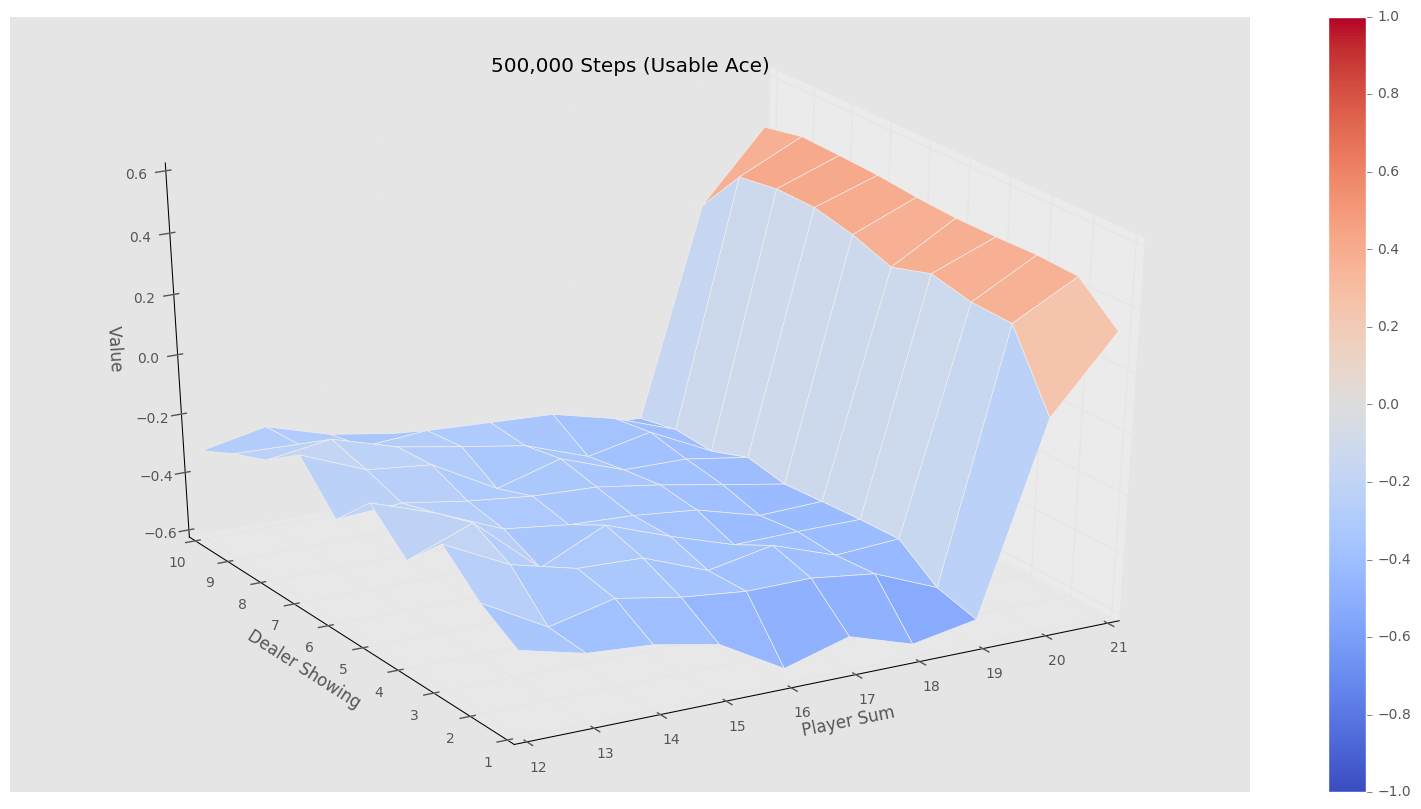

In [24]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [28]:
np.random.rand()

0.22045103511281128